In [100]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy
from scipy import stats

In [216]:
migVSmoney=pd.read_csv("weightedpopcashANDmoney.csv")
#migVSmoney=pd.read_csv("Halukas3on1.csv")

migVSmoney["logflow"]=np.log((migVSmoney.tot_flows_o))
migVSmoney["logcash"]=np.log((migVSmoney.a_ODA_total_avbyyr))
#migVSmoney["logflow"]=((migVSmoney.tot_flows_o))
#migVSmoney["logcash"]=((migVSmoney.a_ODA_total_avbyyr))
migVSmoney.head()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log


,origin,year,tot_flows_o,a_ODA_total_avbyyr,logflow,logcash
0,Afghanistan,1996,0.000685,0.000017,-7.286481,-11.007884
1,Afghanistan,1997,0.000694,0.000016,-7.272420,-11.022944
2,Afghanistan,1998,0.000696,0.000015,-7.269578,-11.088938
3,Afghanistan,1999,0.000627,0.000015,-7.374014,-11.140325
4,Afghanistan,2000,0.000591,0.000012,-7.432899,-11.333406


In [217]:
migVSmoney=migVSmoney[migVSmoney["logflow"]!=0]
migVSmoney=migVSmoney[migVSmoney["logcash"]!=0]
with pd.option_context('mode.use_inf_as_null', True):
    migVSmoney["logflow"] = migVSmoney["logflow"].dropna()
    migVSmoney["logcash"] = migVSmoney["logcash"].dropna()
migVSmoney=migVSmoney[["origin","logflow","logcash"]]

migVSmoney.head()

,origin,logflow,logcash
0,Afghanistan,-7.286481,-11.007884
1,Afghanistan,-7.272420,-11.022944
2,Afghanistan,-7.269578,-11.088938
3,Afghanistan,-7.374014,-11.140325
4,Afghanistan,-7.432899,-11.333406


In [218]:
migVSmoney=migVSmoney.dropna(how="any")

In [219]:
#migVSmoney=migVSmoney.sort_values(by="3yrAverage Money")
migVSmoney.head()

,origin,logflow,logcash
0,Afghanistan,-7.286481,-11.007884
1,Afghanistan,-7.272420,-11.022944
2,Afghanistan,-7.269578,-11.088938
3,Afghanistan,-7.374014,-11.140325
4,Afghanistan,-7.432899,-11.333406


In [220]:
#migVSmoney=migVSmoney[migVSmoney["Recipient"]=="Syrian Arab Republic"]

#migVSmoney=migVSmoney[migVSmoney["Report Year"]==2007.0]
migVSmoney.head()

,origin,logflow,logcash
0,Afghanistan,-7.286481,-11.007884
1,Afghanistan,-7.272420,-11.022944
2,Afghanistan,-7.269578,-11.088938
3,Afghanistan,-7.374014,-11.140325
4,Afghanistan,-7.432899,-11.333406


In [221]:
migVSmoney=migVSmoney.rename(columns={"logflow":"3yrAverage Migration","logcash":"3yrAverage Money"})
migVSmoney

,origin,3yrAverage Migration,3yrAverage Money
0,Afghanistan,-7.286481,-11.007884
1,Afghanistan,-7.272420,-11.022944
2,Afghanistan,-7.269578,-11.088938
3,Afghanistan,-7.374014,-11.140325
4,Afghanistan,-7.432899,-11.333406
5,Afghanistan,-7.144271,-10.855852
6,Afghanistan,-7.009533,-9.965854
7,Afghanistan,-7.328533,-9.530662
8,Afghanistan,-7.524729,-9.229736
9,Afghanistan,-7.580647,-9.102023


In [222]:
migVSmoneyQ=migVSmoney.quantile([.05, .95])
migVSmoneyQ

,3yrAverage Migration,3yrAverage Money
0.05,-10.199005,-12.462719
0.95,-4.711550,-7.756448


In [223]:
MigrationUPboundary=migVSmoneyQ.iloc[1][-2]
MigrationLOWboundary=migVSmoneyQ.iloc[0][-2]
MoneyUPboundary=migVSmoneyQ.iloc[1][-1]
MoneyLOWboundary=migVSmoneyQ.iloc[0][-1]
print(MigrationUPboundary,MigrationLOWboundary)
print(MoneyUPboundary,MoneyLOWboundary)

-4.71154959305 -10.1990052256
-7.75644848399 -12.4627192782


In [224]:
df=migVSmoney
len(migVSmoney)

2601

In [225]:
migVSmoneyQ = migVSmoney[(migVSmoney["3yrAverage Money"] > MoneyLOWboundary) & (migVSmoney["3yrAverage Money"] < MoneyUPboundary) ]
df = migVSmoneyQ[(migVSmoneyQ["3yrAverage Migration"] > MigrationLOWboundary) & (migVSmoneyQ["3yrAverage Migration"] < MigrationUPboundary)]
len(df)

2129

In [226]:
# define the data/predictors as the pre-set feature names  
#df = pd.DataFrame(df, columns=["Average Sum of Money"])

# Put the target (housing value -- MEDV) in another DataFrame
#target = pd.DataFrame(df, columns=["Average of emigration over all OECD countries"])

In [227]:
#Shapiro-Wilk
x = df['3yrAverage Money']
y = df["3yrAverage Migration"]

shapiro_results = scipy.stats.shapiro(x)

print(shapiro_results)
shapiro_results = scipy.stats.shapiro(y)

print(shapiro_results)

df["3yrAverage Migration"].to_csv("showmig.csv")

(0.9871066212654114, 6.314822796615882e-13)
(0.9791070818901062, 4.0774379370698904e-17)


In [228]:
x = df['3yrAverage Money']
y = df["3yrAverage Migration"]

levene_results = scipy.stats.levene(x,y)

print(levene_results)


LeveneResult(statistic=235.99944989952064, pvalue=7.0653542527233382e-52)


In [229]:
import statsmodels.api as sm

X = df['3yrAverage Money']
y = df["3yrAverage Migration"]

X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     3yrAverage Migration   R-squared:                       0.028
Model:                              OLS   Adj. R-squared:                  0.027
Method:                   Least Squares   F-statistic:                     60.53
Date:                  Thu, 16 Nov 2017   Prob (F-statistic):           1.12e-14
Time:                          15:23:11   Log-Likelihood:                -3684.9
No. Observations:                  2129   AIC:                             7374.
Df Residuals:                      2127   BIC:                             7385.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -5.0684      0.289    -17.518      0.000      -5.636      -4.501
3yrAverage Money     0.2274      0.029      7.780      0.000       0.170       0.285
==============================================================================
Omnibus:                      215.034   Durbin-Watson:                   0.255
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.126
Skew:                          -0.194   Prob(JB):                     8.01e-17
Kurtosis:                       2.172   Cond. No.                         97.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

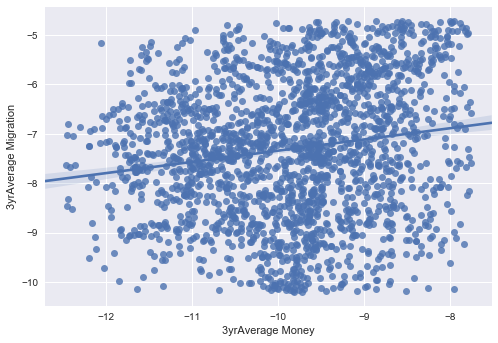

In [230]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='3yrAverage Money', y="3yrAverage Migration", data=df)
plt.show()